In [3]:
import cv2
import os
import numpy as np
from skimage import io
from PIL import Image, ImageChops, ImageEnhance
from matplotlib import pyplot as plt

In [4]:
def extract_features_ela(image, quality=95, enhance_factor=10):
    try:
        temp_path = "temp_recompressed.jpg"
        image.save(temp_path, format="JPEG", quality=quality)
        recompressed = Image.open(temp_path)
        os.remove(temp_path)
        ela_image = ImageChops.difference(image, recompressed)

        enhancer = ImageEnhance.Brightness(ela_image)
        enhanced_ela = enhancer.enhance(enhance_factor)

        resized_ela = enhanced_ela.resize((224, 224)).convert("L") 
        feature_array = np.array(resized_ela).flatten()
        feature_array = feature_array / 255.0

        image_dict = {
            "Original Image": np.array(image),
            "Recompressed Image": np.array(recompressed),
            "ELA Image": np.array(ela_image),
            "Enhanced ELA Image": np.array(enhanced_ela),
        }

        plt.figure(figsize=(16, 10))
        plot_count = 1
        for title, img in image_dict.items():
            plt.subplot(2, 2, plot_count)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            plot_count += 1

        plt.show()

        return feature_array
    except Exception as e:
        print(f"Error processing: {e}")



Real Image


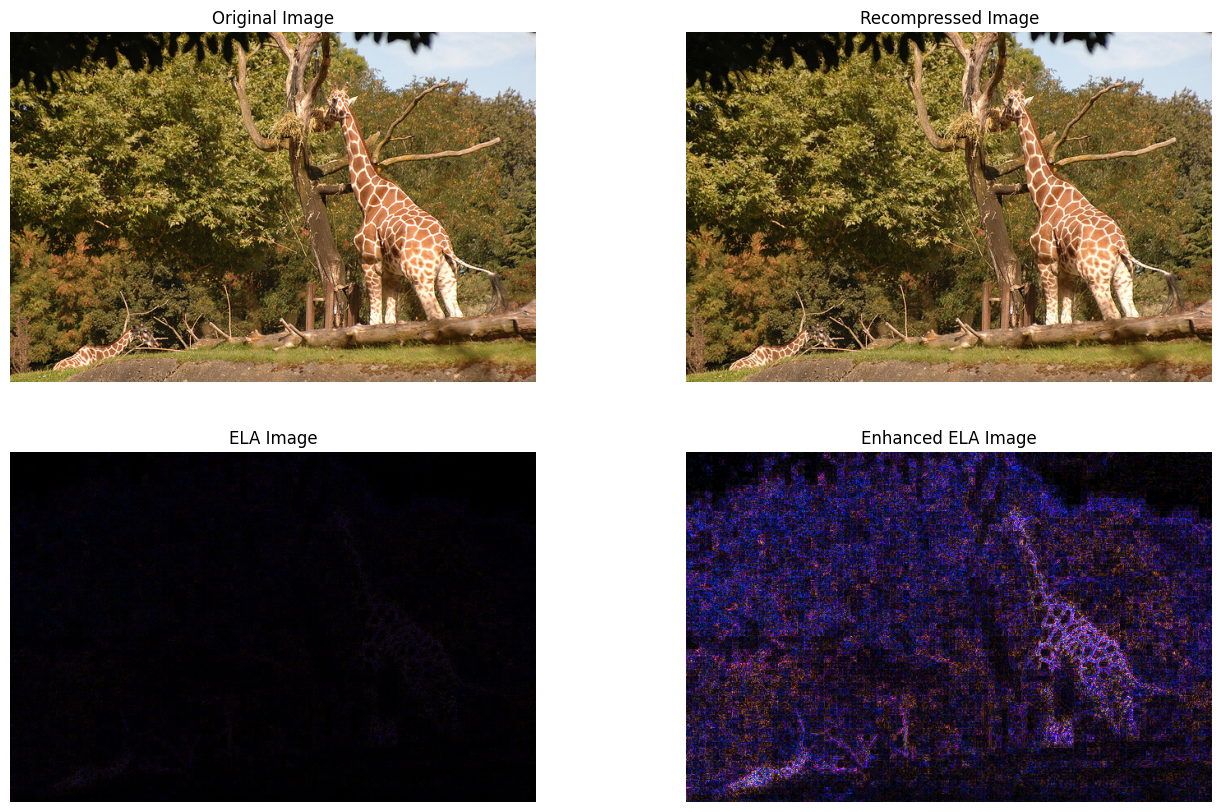

[0.         0.         0.         ... 0.02745098 0.05882353 0.09019608]
AI Generated Image


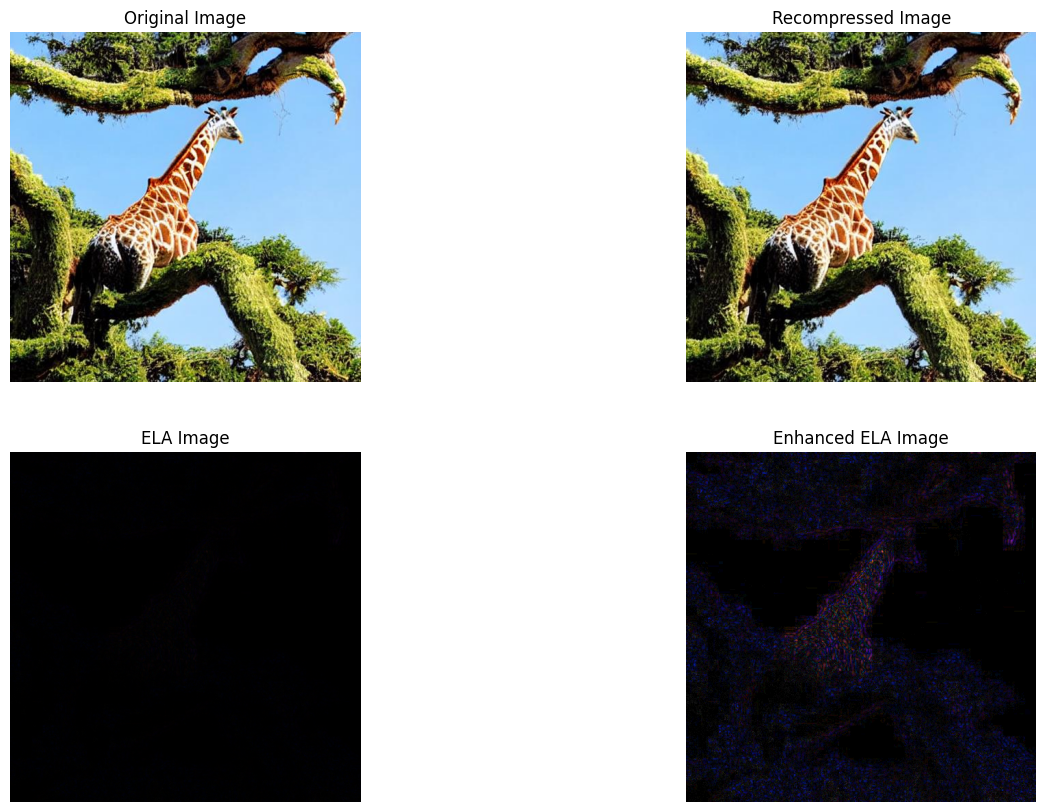

[0.         0.         0.         ... 0.0627451  0.0745098  0.05490196]


In [5]:

img_path = os.getcwd() + r'/AIGC-Detection-Dataset/train/0_real/000000000025.jpg'

# Real Image
print("Real Image")
image = Image.open(img_path)
print(extract_features_ela(image))

# AI Generated Image
print("AI Generated Image")
image = Image.open(img_path.replace("0_real", "1_fake"))
print(extract_features_ela(image))

